## <font color=blue> Stats507  , WI 2019</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   *Problem 1*: 0.4 hour , *Problem 2*: 1.5  *Problem 3*: 2
***

Persons discussed idea about: None

<font color = blue> **relevant packages** </font>

In [1]:
import re
import math
import itertools
import matplotlib as mp
import matplotlib.pyplot as plt
import mrjob
from mrjob.job import MRJob 
from mrjob.step import MRStep
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import os

***
### Problem 1: Warmup: counting words with mrjob (3 points)

#### 1.1:
Write an **mrjob** job that takes text as input and counts how many times each word
occurs in the text. Your script should strip punctuation like full stops, commas and
semicolons, but you may treat hyphens, apostrophes, etc. as you wish. Simplest
is to treat, e.g., “John’s” as two words, “John” and “s”, but feel free to do more
complicated processing if you wish. Your script should ignore case, so that “Cat”
and “cat” are considered the same word. Your output should be a collection of
(word,count) pairs.
***

#### 1.1 sol: 
The file name of **"mr_word_count.py"** consists of the code running the mrjob request, using regular expression to parse out the words (ignoring puncuations) from each line saving it to a list of words. <font color = blue> the regex compliation is shown as below in the raw type cell, the hyphenated words or dashed words are splitted into seperate words</font>, <font color = red>however, apostropheted words like **he's** is considered as one since all apostrophes are not removed</font>

In [2]:
proper_words = re.compile(r'[\w\']+')

**contents of "mr_word_count.py" is cat as below**

In [3]:
!cat mr_word_count.py

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 16 19:57:21 2019

###############################################
This file contains the class extends from mrjob
in the purpose of returning the according 
frequency and the word given a text as input
###############################################

@author: zizhao zhang
"""

###import library###
from mrjob.job import MRJob
import re

proper_words = re.compile(r'[\w\']+')

class Text_frequency_count (MRJob):
    # Mapper to read line, yield that word and a counter of 1 per line
    def mapper(self, _,line):
        line = line.strip()
        for word in proper_words.findall(line):
            yield (word.lower(), 1)
    # Optional combiner for the optimization to count words
    # def combiner (self, word, count):
       # yield (word, sum(count))
    # Reduce over all nodes to get word count in a format of [words, count].
    def reducer(self, word, count):
        yield (word, sum(count))
#to run in bash
if __nam

#### 1.2 
 To test your code, I have uploaded a simple text file to the course webpage:
http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/simple.txt .
Download this file and test your code either on your local machine or on the Fladoop
grid. The file is small enough that you should be able to check by hand whether your
STATS507: Data Analysis in Python 2
code is behaving correctly. Save the output of running your script on this small file
to a file called **simple_word_counts.txt** and include it in your submission

Python command of saving result is shown as below, erro/status message can be seen as below and the standard output is consisted in the file
***

#### 1.2 sol:

In [4]:
!python mr_word_count.py < simple.txt >  simple_word_counts.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 1...
Creating temp directory /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_word_count.zizhaozhang.20190408.010836.559292
reading from STDIN
job output is in /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_word_count.zizhaozhang.20190408.010836.559292/output
Streaming final output from /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_word_count.zizhaozhang.20190408.010836.559292/output...
Removing temp directory /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_word_count.zizhaozhang.20190408.010836.559292...


***
Result of the file is shown as below, Note that there is oddities in the output result as the format of "cheese", and "raining" is off due to the length of the strings <font color = blue> consists more than 5 characters
***

In [5]:
!cat simple_word_counts.txt

"fleas"	1
"cheese"	1
"dogs"	2
"eat"	2
"raining"	1
"cats"	3
"have"	1
"mice"	3
"and"	3


#### 1.3:
Once you are confident in the correctness of your program, run your mrjob script
on the file

                hdfs:/var/stats507w19/darwin.txt

on the Fladoop grid (this file is the Project Gutenberg plain text version of Charles
Darwin’s scientific work On the Origin of Species). Note that this file is on hdfs, not
the local file system, so you’ll have to run your script accordingly. Save the output
to a file called **darwin_word_counts.txt**, and include it in your submission.


<font color = blue> Note: login bash commands: " ssh uniqname@flux-hadoop-login.arc-ts.umich.edu " </font>


***
#### 1.3 sol:

<font color = red>step1: </font>**below is the command to run on the local bash in the same directory as the notebook file to send the py file**

**Note:** directory ~/stats507/zizhaoz_hw8/ already existed in the flux hadoop server

<font color = red>step2: </font> **below is the command to run on the flux - hadoop server to output the desired result file**

<font color = red>step3: </font> **below is the command to run on the local bash in the same directory as the notebook file to retrive the result file**

As we can tell from below, the file is properly copied to our local directory 

In [6]:
os.path.isfile('./darwin_word_counts.txt')

True

#### 1.4:
Zipf’s law states, roughly, that if one plots word frequency against frequency rank
(i.e., most frequent word, second most frequent word, etc.), the resulting line is (approximately) linear on a log-log scale. Using the information in **darwin_word_counts.txt**,
make a plot of word frequency as a function of word rank on a log-log scale for all
words in the file

                hdfs:/var/stats507w19/darwin.txt
    
Give an appropriate title to your plot and include axis labels. Save the plot as a pdf
file called **zipf.pdf**, and include it in your submission.
***

#### 1.4 sol:

In [7]:
words_count_df = pd.read_csv("./darwin_word_counts.txt", header = None, sep = "\t")
words_count_df.columns = ["word","count"]

In [8]:
#rank the count based on frequency
words_count_df["count_rank"] = words_count_df["count"].rank(ascending=False)
words_count_df = words_count_df.sort_values(by=['count_rank'] , ascending=True)

In [9]:
words_count_df.head(10)

,word,count,count_rank
8374,the,14734,1.0
5882,of,10543,2.0
493,and,5919,3.0
4389,in,5471,4.0
8469,to,4832,5.0
156,a,3437,6.0
8372,that,2764,7.0
684,as,2240,8.0
4017,have,2119,9.0
920,be,2118,10.0


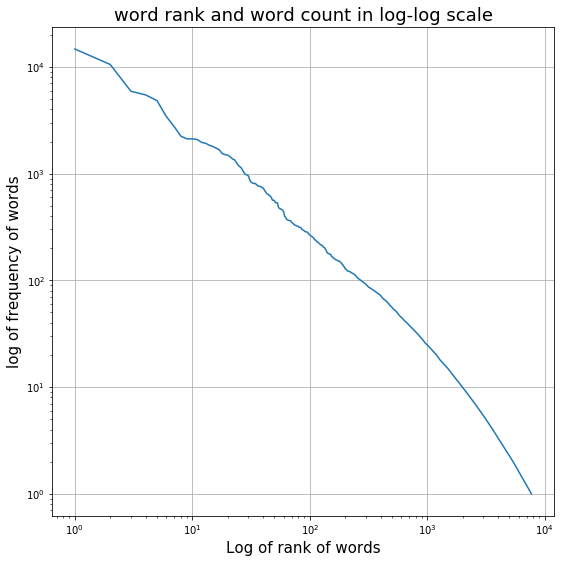

In [10]:
plt.figure(figsize = (9,9))
plt.grid()
plt.loglog(words_count_df["count_rank"], words_count_df["count"] )
plt.xlabel("Log of rank of words", fontsize = 15)
plt.ylabel("log of frequency of words", fontsize = 15)
plt.title("word rank and word count in log-log scale", fontsize = 18)
_ = plt.show()

#### or more precisely using a scatterplot as below

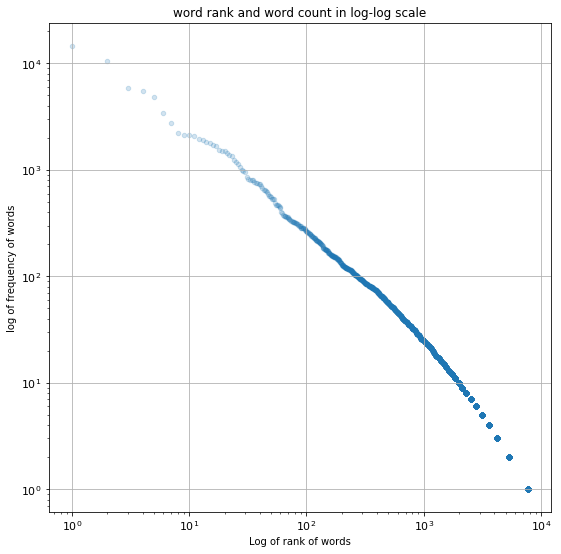

In [11]:
log_plot = words_count_df.plot(figsize = (9,9),
                               x = "count_rank",
                               y = "count", 
                               kind = "scatter",
                               loglog = True,
                               alpha = 0.2,
                               title = "word rank and word count in log-log scale",
                               fontsize = 11,
                               grid = True,
                               legend = True
                               )
log_plot.set_xlabel("Log of rank of words")
log_plot.set_ylabel("log of frequency of words")
_ = plt.show()
log_plot.figure.savefig('zipf.pdf')

#### 1.5:
How “Zipfian” does the resulting plot look (It suffices for you to state whether or
not your plot looks approximately like a line)?
***
#### 1.5 sol:
According to the "Zipfian" law, the plot generated from above, looks align with a Zeta distribution of a higher degree of "s", just like whar the wiki page stated " Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. ". The plot is approximately a negatively sloped linear line


***
### Problem 2: Computing Sample Statistics with mrjob (6 points)
#### 2.1:
Write a mrjob program called **mr_summary_stats.py** that takes as input a sequence
of (label,value) pairs like in the file at http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/populations_small.txt, and outputs a collection of (label, number of samples, mean, variance) 4-tuples, in which one 4-tuple
appears for each class label in the data, and the mean and variance are the sample
mean and variance, respectively, of all the values for that class label.
***

#### 2.1 sol:

Note that variance can be calculated in below ways for the ease of calculation and mapping $$
\sigma^{2}
=\frac{\sum X^{2}}{N}-\mu^{2}
$$
such mathematical calculation is rendered in the py file under second reducer

**<font color = red>Note: the sample mean is devided by n</font>**

lets try out the first mapper which returns the **label, and a list of (#of occurance, value, value squared)**

In [12]:
!python mr_summary_stats.py --mapper --step-num=0 < populations_small.txt

0	[1, 2.0, 4.0]
0	[1, 0.0, 0.0]
0	[1, -2.0, 4.0]
1	[1, 10.0, 100.0]
1	[1, 10.0, 100.0]
1	[1, 10.0, 100.0]
1	[1, 10.0, 100.0]
2	[1, 1.0, 1.0]
2	[1, 3.0, 9.0]
2	[1, 5.0, 25.0]
2	[1, 7.0, 49.0]
2	[1, 9.0, 81.0]


#### 2.2:
Run the py scripts save output

***
#### 2.2 sol:
The bash run scripts and output of summary_small.txt is shown as below

In [13]:
!python mr_summary_stats.py < populations_small.txt > summary_small.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_summary_stats.zizhaozhang.20190408.010839.510150
reading from STDIN
Running step 2 of 2...
job output is in /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_summary_stats.zizhaozhang.20190408.010839.510150/output
Streaming final output from /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_summary_stats.zizhaozhang.20190408.010839.510150/output...
Removing temp directory /var/folders/qk/9ycrb_xx7xq9lq8ddyqqnpbr0000gn/T/mr_summary_stats.zizhaozhang.20190408.010839.510150...


In [14]:
!cat summary_small.txt

0	[3, 0.0, 2.6666666666666665]
1	[4, 10.0, 0.0]
2	[5, 5.0, 8.0]


#### 2.3:
I have uploaded to the Fladoop cluster a much larger data file, located on the
HDFS file system at 

            hdfs:/var/stats507w19/populations_large.txt
            
Once you are sure that your script is doing what you want, run it on this file. Be sure to use
the -r hadoop command to tell mrjob to run on the Hadoop server rather than on
the login node. Save the output to a file called summary large.txt.

***
#### 2.3 sol:

<font color = red>step1: </font>**below is the command to run on the local bash in the same directory as the notebook file to send the py file**

**Note:** directory ~/stats507/zizhaoz_hw8/ already existed in the flux hadoop server

<font color = red>step2: </font> **below is the command to run on the flux - hadoop server to output the desired result file**

**log of the Fladoop shell session is shown as below**

<font color = red>step3: </font> **below is the command to run on the local bash in the same directory as the notebook file to retrive the result file**

#### the locally retrived summary_large.txt is cat as below

In [15]:
if os.path.isfile('./summary_large.txt'):
    !cat summary_large.txt

0	[862338,9.8723876989,88876649.9762566537]
1	[452810,-18.5601023777,93247482.7903822213]
10	[17310,98.4633204592,108084209.9447235465]
11	[897044,-9.164971808,83932099.4666945338]
12	[222066,-5.5062780164,80631434.9451120943]
13	[158627,44.1673229575,102056021.735591501]
14	[873568,20.4287172296,102647242.9599751383]
15	[17016,144.5863449707,78999640.0529580861]
16	[678390,17.0399901669,83348553.4643739313]
17	[145306,-3.2899699519,69866385.3784090281]
18	[134370,-14.5280964438,105645041.2298437655]
19	[229768,-3.3207148817,91850219.0803911239]
2	[105548,-15.2362230833,83553366.6341636181]
20	[676289,0.3219578656,102028374.4676386863]
21	[1146955,28.0316962742,65361314.7443429008]
22	[490487,6.2740169363,75418085.9576252997]
23	[223434,-2.9732090622,97484417.2359191328]
24	[112730,71.0843919881,103876466.2121580988]
3	[358093,0.6398833915,109463481.4812636077]
4	[137728,-21.6628919329,76603243.7971047461]
5	[223385,24.3867215747,127109022.55292283]
6	[1081245,15.9633708407,88374442.49

#### 2.4:
Use matplotlib and the results in summary_large.txt to create a plot displaying
95% confidence intervals for the sample means of the populations given by the class
labels in file 
        
        hdfs:/var/stats507w19/populations large.txt.
***
#### 2.4 sol: plot the 95% CI Barplot and save it to a pdf file

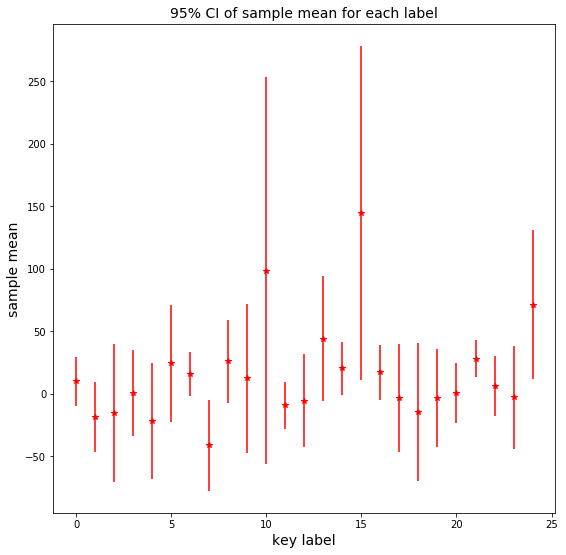

In [16]:
pic = plt.figure(figsize=(9,9))
label,number, mean, var = [],[],[],[]
if os.path.isfile('./summary_large.txt'):
    file = open('./summary_large.txt')
    for line in file:
        #store labels
        label.append(int(line.strip().split()[0]))
        number.append([float(i) for i in line.split()[1][1:-1].split(",")][0])
        mean.append([float(i) for i in line.split()[1][1:-1].split(",")][1])
        var.append([float(i) for i in line.split()[1][1:-1].split(",")][2])
#npndarray for calculation of CI
label = np.array(label)
number = np.array(number)
mean = np.array(mean)
var = np.array(var)
#use the error plot the 95% CI---> z = 1.96 error chart
err = np.sqrt(var/number)
plt.xlabel("key label", fontsize = 14)
plt.ylabel("sample mean", fontsize = 14)
plt.title("95% CI of sample mean for each label", fontsize = 14)
plt.errorbar(x = label, y = mean, xerr = 0, yerr = 1.96*err, fmt = "r*")
_ = plt.show()
#save to output pdf
pic.savefig('populations.pdf')

### Problem 3: Graph Processing: Counting Triangles with PySpark (6 points)

#### 3.1: 
Write a PySpark job that takes the described input and produces a list of all the
triangles in the network, one per line. Each triangle should be listed as a spaceseparated line node1 node2 node3, with the entries sorted numerically in ascending
order. So, if nodes 2, 5 and 15 form a triangle, the output should include the triple
(2,5,15), but not (2,15,5), (15,2,5), etc. Save your script in a file called **ps_fof.py**
and include it in your submission

***
#### 3.1 sol: 
The desired code scripts is in the file ps_fof.py

In [18]:
if os.path.isfile('./ps_fof.py'):
    !cat ps_fof.py

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 29 22:45:29 2019

@author: zizhao zhang

PySpark Job to take the described input and produces a list of all the
triangles in the network, one per line

allocation set up part is referenced from http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/ps_wordcount.py

"""

from pyspark import SparkConf, SparkContext
import sys
import itertools 



# This script takes two arguments, an input and output
if len(sys.argv) != 3:
    print('Usage: ' + sys.argv[0] + ' <in> <out>')
    sys.exit(1)
inputlocation = sys.argv[1]
outputlocation = sys.argv[2]

# Set up the configuration and job context
conf = SparkConf().setAppName("CountTriangles")
sc = SparkContext(conf=conf)

# Read in the dataset 
data = sc.textFile(inputlocation)

#define a mapper function
def triplets_mapper(line):
    '''
    mapper for transforming input to output key value pairs
    where keys are tuples of friends and value is a count
    
    '

#### 3.2:
Test your script on the set of 5 simple files in the HDFS directory

    hdfs:/var/stats507w19/fof/friends.simple
    
which is small enough that you should be able to work out by hand what the correct
output is. How many triangles are there? List them in a file called **small_triangle_list.txt**
and include it in your submission.
***
#### 3.2 sol
<font color = red>step1: </font>**below is the command to run on the local bash in the same directory as the notebook file to send the py file**

**Note:** directory ~/stats507/zizhaoz_hw8/ already existed in the flux hadoop server

<font color = red>step2: </font> **below is the command to run on the flux - hadoop server to output the desired result**

**save the file into a txt file by below command:**

<font color = red>step 3:</font> **transfer the result small_triangle_list.txt back to local**,
**below is the command to run on the local bash in the same directory as the notebook file to retrive the result file**

In [19]:
#show result
if os.path.isfile('./small_triangle_list.txt'):
    !cat small_triangle_list.txt

(100, 200, 217)
(100, 200, 300)
(100, 200, 400)
(100, 300, 400)
(200, 300, 400)
(300, 400, 500)


#### 3.3: 
Once you are confident that your script is correct, run it on the larger data set, stored
on HDFS at 

    hdfs:/var/stats507w19/fof/friends1000 
Save the list of triangles
to a file called **big_triangle_list.txt**, and include it in your submission. Don’t
forget to include in your notebook file a copy-paste of the commands you used to
launch your job along with their outputs.

***
#### 3.3 sol:
since the py scripts is already in the hadoop flux hw directory, to get the result, proceeds with following scripts

<font color = red>step2: </font> **below is the command to run on the flux - hadoop server(in dir where the py script is) to output the desired result**

below is a copy paste result from the hadoop server

**save the file into a txt file by below command:**

all files in the hw dir

<font color = red>step 3:</font> **transfer the result big_triangle_list.txt back to local**,
**below is the command to run on the local bash in the same directory as the notebook file to retrive the result file**

**show the first 5 lines of the file**

In [20]:
#show result
if os.path.isfile('./big_triangle_list.txt'):
    with open('./big_triangle_list.txt') as f:
        first_5_lines = f.readlines()[0:5]
        first_5_lines = [i.strip() for i in first_5_lines]

In [21]:
first_5_lines

['(0, 7, 74)', '(0, 7, 193)', '(0, 7, 283)', '(0, 7, 332)', '(0, 7, 483)']

In [22]:
len(open('./big_triangle_list.txt').readlines())

144120

In fact, there are 144120 triangles 